### Import library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

### Baca File

In [3]:
# Membaca data dari file csv
df = pd.read_csv("D:/Coding/Pembelajaran Mesin/Pembelajaran_Mesin/UTS2/Data/heart.csv")
# Mencetak objek df
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Sekilas tentang dataset:
Dataset tersebut memiliki 14 atribut dengan jumlah yakni 1025. Terdapat pada beberapa atribut sudah dilakukan normalisasi sebelumnya sehingga perlu untuk diperjelas terkait dengan hasil normalisasi tersebut. Oleh sebab itu, berikut merupakan tabel yang dilakukan normalisasi sebelumnya berserta keterangan yang terkait:
1. sex      : 0 merupakan perempuan dan 1 merupakan laki-laki
2. fbs      : 0 merupakan salah dan 1 merupakan benar
3. exang    : 0 merupakan no dan 1 merupakan yes
4. thal     : 0 merupakan cacat, 1 merupakan cacat tetap dan 2 merupakan cacat yang dapat dibalik
5. target    : 0 merupakan tidak ada penyakit dan 1 merupakan penyakit


### Prepocessing

In [4]:
# Menampilkan dimensi DataFrame
df.shape


(1025, 14)

In [5]:
# Menampilkan 5 baris pertama DataFrame
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Menampilkan 5 baris terakhir DataFrame
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
# Menampilkan informasi tipe data dan jumlah data yang hilang di setiap kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Columns Description

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

1. usia
2. Jenis Kelamin
3. jenis nyeri dada (4 nilai)
4. tekanan darah istirahat
5. kolestoral serum dalam mg/dl
6. gula darah puasa >120 mg/dl
7. hasil elektrokardiografi istirahat (nilai 0,1,2)
8. detak jantung maksimal tercapai
9. angina akibat olahraga
10. oldpeak = Depresi ST yang disebabkan oleh olahraga dibandingkan istirahat
11. kemiringan puncak latihan segmen ST
12. jumlah pembuluh darah besar (0-3) yang diwarnai dengan flourosopy
13. thal: 0 = biasa; 1 = cacat tetap; 2 = cacat yang dapat dibalik
14. Nama dan nomor jaminan sosial pasien baru-baru ini dihapus dari database, diganti dengan nilai tiruan.

In [8]:
# Menampilkan statistik deskriptif DataFrame
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Mengecek apakah ada data yang hilang di DataFrame
df.isnull()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#cek data yang hilang
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#cek duplikasi data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  723


In [12]:
#Hapus duplikasi data
df.drop_duplicates(inplace=True)


In [13]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


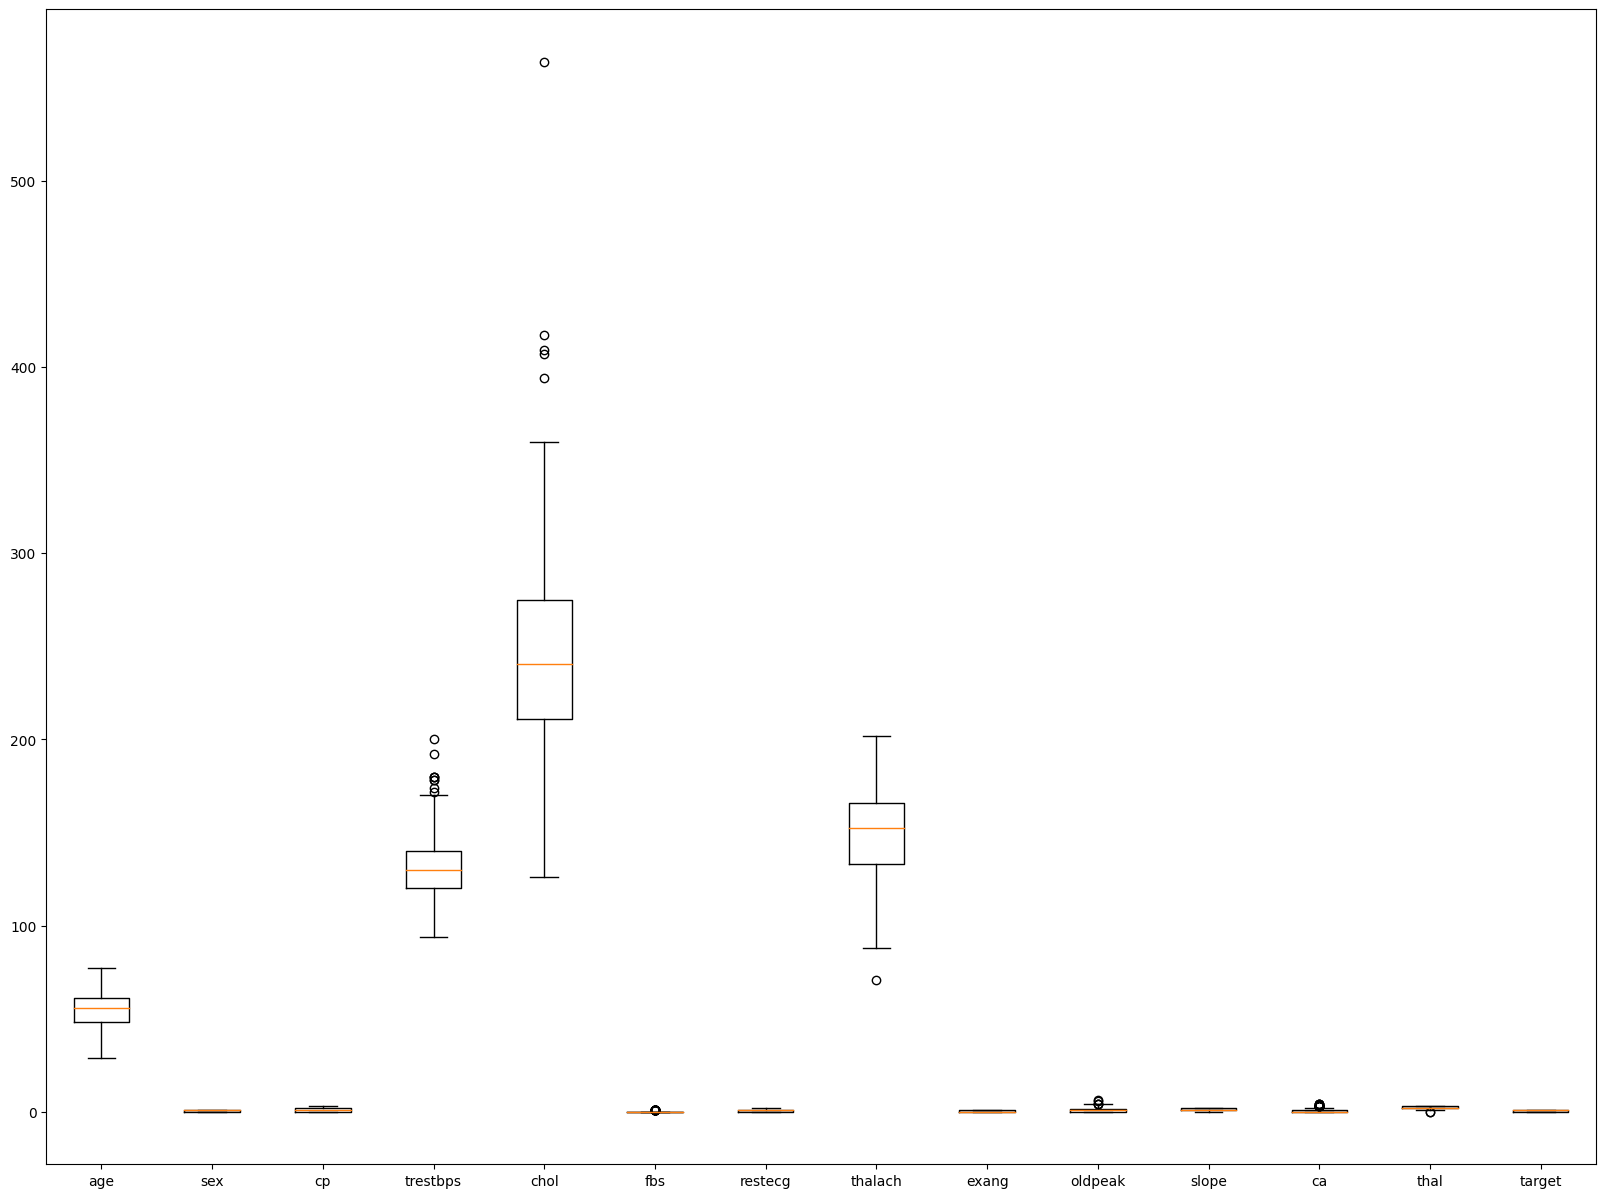

In [14]:
# Check Outliers
plt.figure(figsize=(20, 15))
plt.boxplot(df, labels=df.columns)
plt.show()

In [15]:
# fungsi untuk menampilkan grafik dari outlier
def tampil_outlier(df, kolom):
  plt.boxplot(df[kolom], labels=[kolom])
  outlier = plt.title('Outliers values')
  return outlier

In [16]:
# function untuk menghapus outliers
def hapus_outliers(df, kolom):
    q1 = df[kolom].quantile(0.25)
    q3 = df[kolom].quantile(0.75)
    iqr = q3 - q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5
    for i in df.index:
        if df.loc[i, kolom] > toprange:
            df.loc[i, kolom] = toprange
        if df.loc[i, kolom] < botrange:
            df.loc[i, kolom] = botrange
    return tampil_grafik(df, kolom)

In [17]:
# function untuk menampilkan grafik dari hasil outlier yang dihapus
def tampil_grafik(df, kolom):
  plt.boxplot(df[kolom], labels=[kolom])
  grafik = plt.title('Cleaning values')
  return grafik

Text(0.5, 1.0, 'Outliers values')

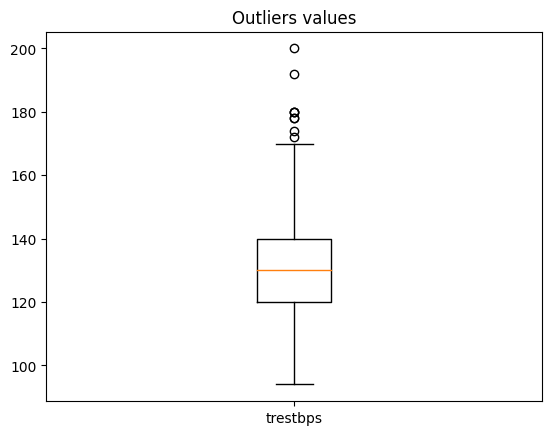

In [18]:
# menampilkan outlier pada kolom trestbps
tampil_outlier(df, 'trestbps')

Text(0.5, 1.0, 'Cleaning values')

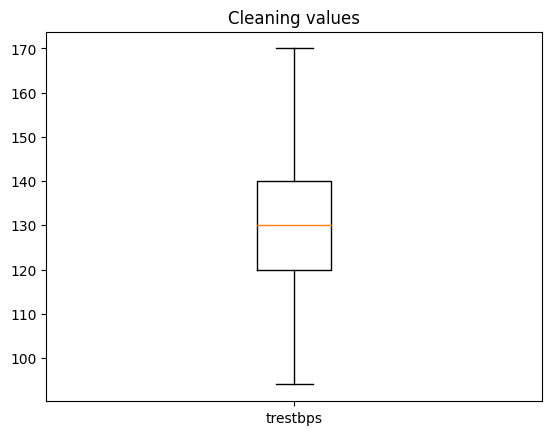

In [19]:
# menghapus outlier pada kolom trestbps
hapus_outliers(df, 'trestbps')

Text(0.5, 1.0, 'Outliers values')

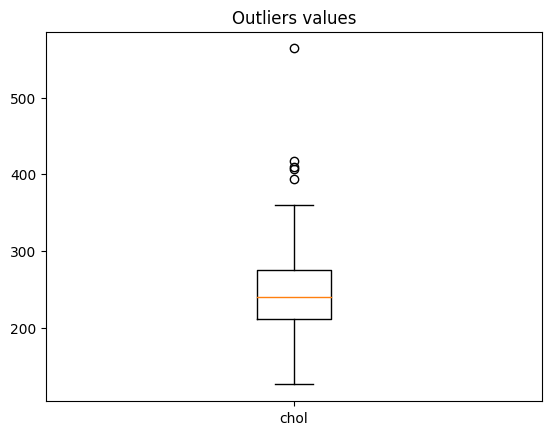

In [20]:
# menampilkan outlier pada kolom chol
tampil_outlier(df, 'chol')

Text(0.5, 1.0, 'Cleaning values')

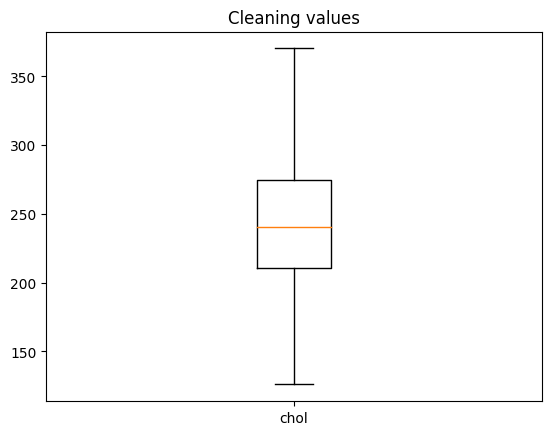

In [21]:
# menghapus outlier pada kolom chol
hapus_outliers(df, 'chol')

Text(0.5, 1.0, 'Outliers values')

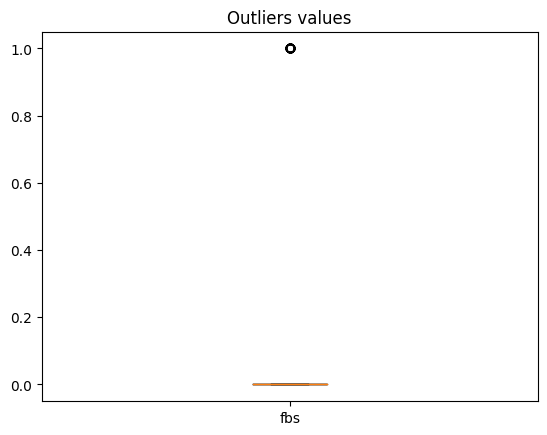

In [22]:
# menampilkan outlier pada kolom fbs
tampil_outlier(df, 'fbs')

Text(0.5, 1.0, 'Cleaning values')

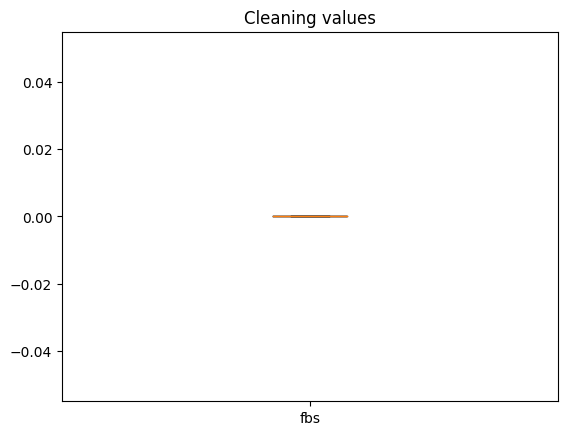

In [23]:
# menghapus outlier pada kolom fbs
hapus_outliers(df, 'fbs')

Text(0.5, 1.0, 'Outliers values')

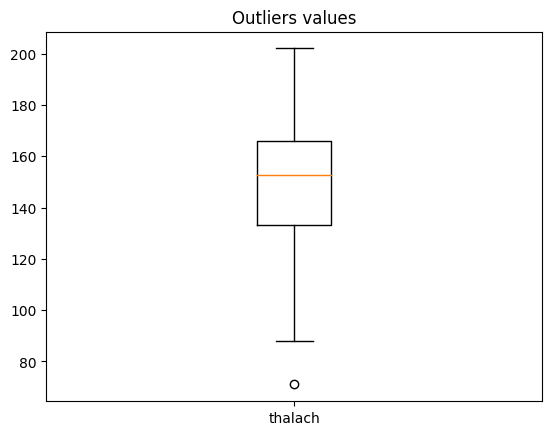

In [24]:
# menampilkan outlier pada kolom thalach
tampil_outlier(df, 'thalach')

Text(0.5, 1.0, 'Cleaning values')

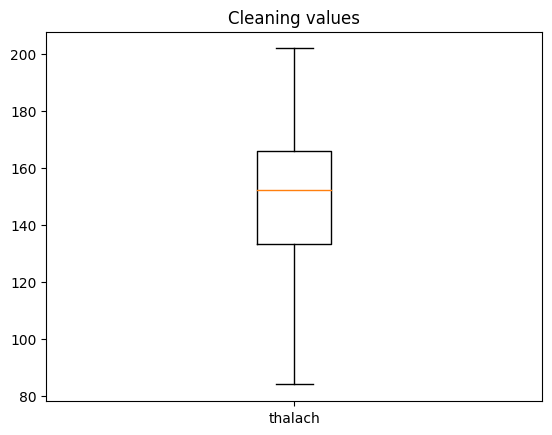

In [25]:
# menghapus outlier pada kolom thalach
hapus_outliers(df, 'thalach')

Text(0.5, 1.0, 'Outliers values')

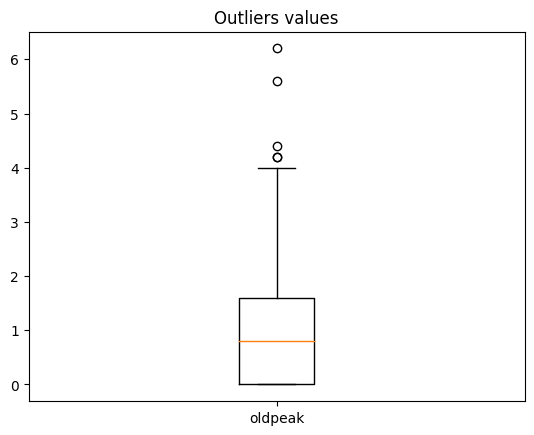

In [26]:
# menampilkan outlier pada kolom oldpeak
tampil_outlier(df, 'oldpeak')

Text(0.5, 1.0, 'Cleaning values')

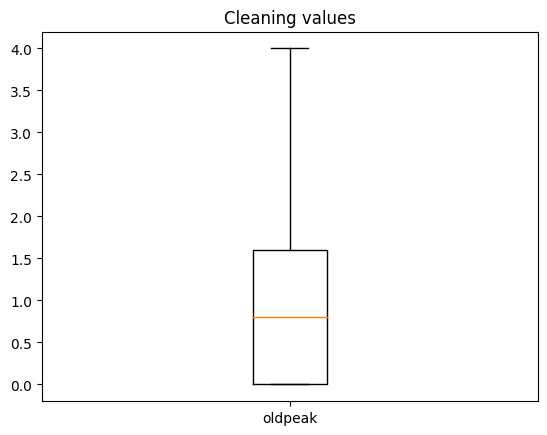

In [27]:
# menghapus outlier pada kolom oldpeak
hapus_outliers(df, 'oldpeak')

Text(0.5, 1.0, 'Outliers values')

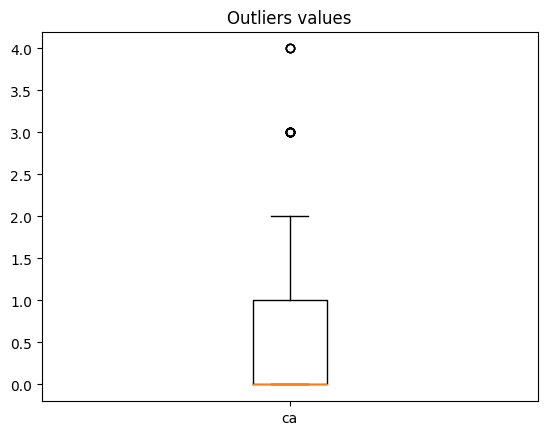

In [28]:
# menampilkan outlier pada kolom ca
tampil_outlier(df, 'ca')

Text(0.5, 1.0, 'Cleaning values')

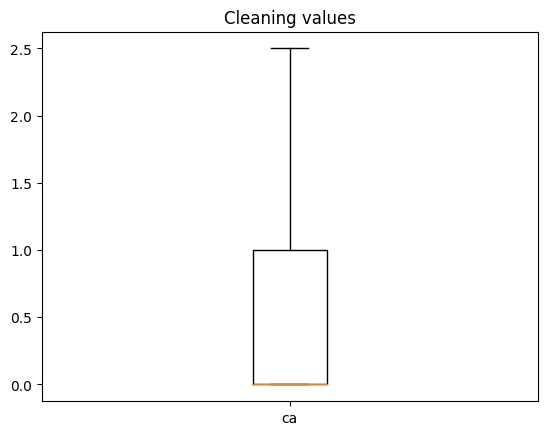

In [29]:
# menghapus outlier pada kolom ca
hapus_outliers(df, 'ca')

Text(0.5, 1.0, 'Outliers values')

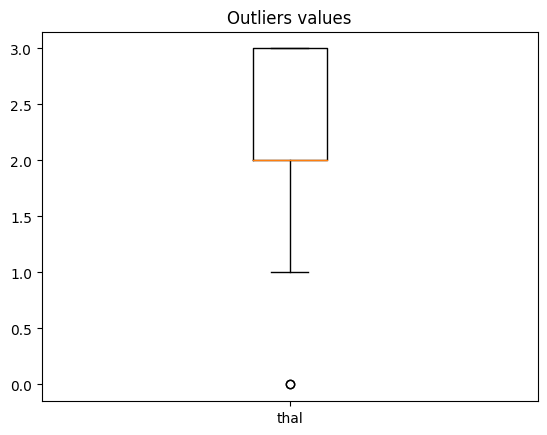

In [30]:
# menampilkan outlier pada kolom thal
tampil_outlier(df, 'thal')

Text(0.5, 1.0, 'Cleaning values')

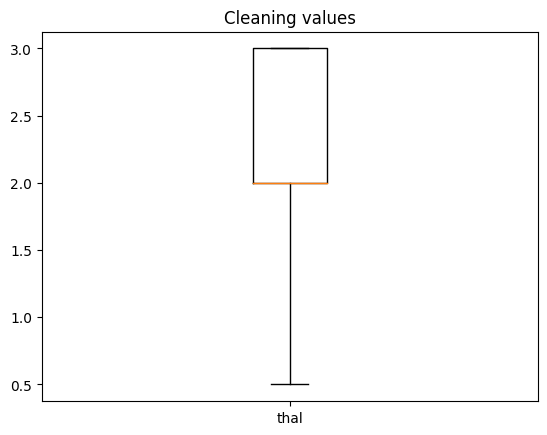

In [31]:
# menghapus outlier pada kolom thal
hapus_outliers(df, 'thal')

In [32]:
# Melakukan normalisasi
discrete_features, continuous_features = [], []
for feature in df.columns:
    if feature == 'target':
        label = feature
    elif len(df[feature].unique()) > 2:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous:', continuous_features, '\n', 'Label:', label)

Discrete:  ['sex', 'fbs', 'exang'] 
 Continuous: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal'] 
 Label: target


In [33]:
df[discrete_features].head()

,sex,fbs,exang
0,1,0,0
1,1,0,1
2,1,0,1
3,1,0,0
4,0,0,0


In [34]:
# cek kontinu data
df[continuous_features].head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,52,0,125,212.0,1,168.0,1.0,2,2.0,3.0
1,53,0,140,203.0,0,155.0,3.1,0,0.0,3.0
2,70,0,145,174.0,1,125.0,2.6,0,0.0,3.0
3,61,0,148,203.0,1,161.0,0.0,2,1.0,3.0
4,62,0,138,294.0,1,106.0,1.9,1,2.5,2.0


In [35]:
# standarasisasi data kontinu menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[continuous_features])
scaled_continuous_features = scaler.transform(df[continuous_features])
scaled_continuous_features = pd.DataFrame(data=scaled_continuous_features, columns=['age','cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal'])
scaled_continuous_features.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.479167,0.0,0.407895,0.351918,0.5,0.711559,0.250,1.0,0.8,1.0
1,0.500000,0.0,0.605263,0.315090,0.0,0.601273,0.775,0.0,0.0,1.0
2,0.854167,0.0,0.671053,0.196419,0.5,0.346766,0.650,0.0,0.0,1.0
3,0.666667,0.0,0.710526,0.315090,0.5,0.652174,0.000,1.0,0.4,1.0
4,0.687500,0.0,0.578947,0.687468,0.5,0.185578,0.475,0.5,1.0,0.6


In [36]:
# gabung data kontinu dan diskrit
scaled_data = pd.concat([df[discrete_features], scaled_continuous_features, df['target']], axis=1)
scaled_data.describe()

,sex,fbs,exang,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target
count,302.000000,302.0,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.682119,0.0,0.327815,0.529594,0.321192,0.490241,0.488500,0.263245,0.555572,0.256954,0.698675,0.266225,0.727152,0.543046
std,0.466426,0.0,0.470196,0.188499,0.344015,0.218490,0.194319,0.263014,0.193137,0.277599,0.308137,0.352096,0.240689,0.498970
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.395833,0.000000,0.342105,0.347826,0.000000,0.416755,0.000000,0.500000,0.000000,0.600000,0.000000
50%,1.000000,0.0,0.000000,0.552083,0.333333,0.473684,0.468542,0.500000,0.580064,0.200000,0.500000,0.000000,0.600000,1.000000
75%,1.000000,0.0,1.000000,0.666667,0.666667,0.605263,0.608696,0.500000,0.694592,0.400000,1.000000,0.400000,1.000000,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Menampilkan jumlah data untuk setiap variabel target
df["target"].value_counts()


1    164
0    138
Name: target, dtype: int64

Text(0, 0.5, 'Jumlah')

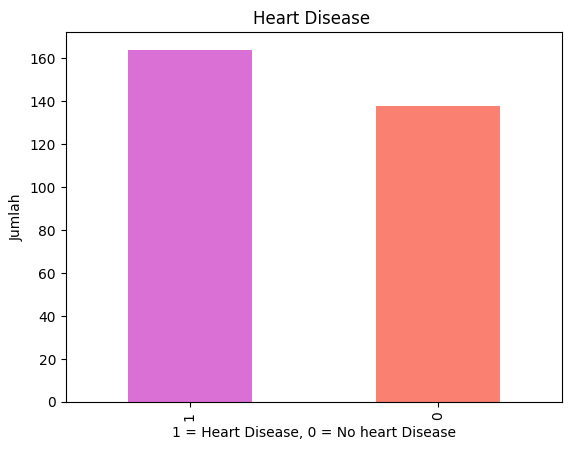

In [38]:
#menampilkan  diagram batang.
df.target.value_counts().plot(kind = 'bar', color=["orchid", "salmon"])
plt.title("Heart Disease ")
plt.xlabel("1 = Heart Disease, 0 = No heart Disease")
plt.ylabel("Jumlah")

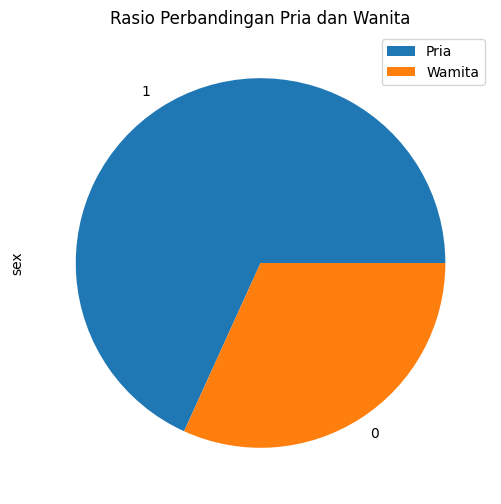

In [39]:
#menamplikan plot diagram pie perbandingan pria dan wanita yang terkena penyakit jantung
df.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Rasio Perbandingan Pria dan Wanita')
plt.legend(['Pria', 'Wamita']);

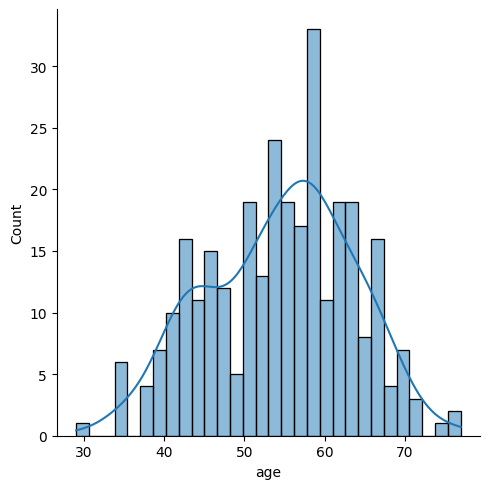

In [40]:
#membuat distribusi dengan grafik kurva berdasarkan usia yang terkena penyakit jantung
sns.displot( x = 'age', data = df, bins = 30, kde = True);

### Modeling

In [41]:
# Mengambil semua kolom kecuali kolom terakhir dari DataFrame
X=df.iloc[:, :-1]
# Mengambil kolom terakhir dari DataFrame
y=df.iloc[:, -1]


In [42]:
# Menampilkan dimensi fitur prediksi
X.shape


(302, 13)

In [43]:
# Menampilkan dimensi variabel target
y.shape


(302,)

### Random Forest

In [44]:
# Pembagian dataset menjadi 80% traning dan 20% testing
# Hal ini sebabkan tingginya akurasi yang diperoleh pada persentase pembagian data tersebut
# dibandingkan dengan pembagian dataset lainnya.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Membuat model RandomForestClassifier dengan kriteria entropi, kedalaman maksimal 8, dan jumlah sampel minimum untuk split 10
model = RandomForestClassifier(criterion="entropy", max_depth=8, min_samples_split=10, random_state=0)
# Melatih model dengan data latih
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=0)

In [46]:
# Melakukan prediksi menggunakan model yang telah dilatih
y_pred = model.predict(X_test)

# Mencetak laporan klasifikasi
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [47]:
# Menghitung skor akurasi
accuracy_score(y_test,y_pred)


0.819672131147541

##### Menggunakan Cross Validation

<b>Catatan :</b><br>
Jika dilihat adanya perbedaan nilai pada accuracy yang diperoleh yakni 82 dan 81,9. Hal ini dikarenakan pada acuracay dengan nilai 81,9 dibulatkan menjadi 82. Oleh sebab itu, dapat disimpulkan bahwa hasil dari kedua akurai tersebut sama saja.

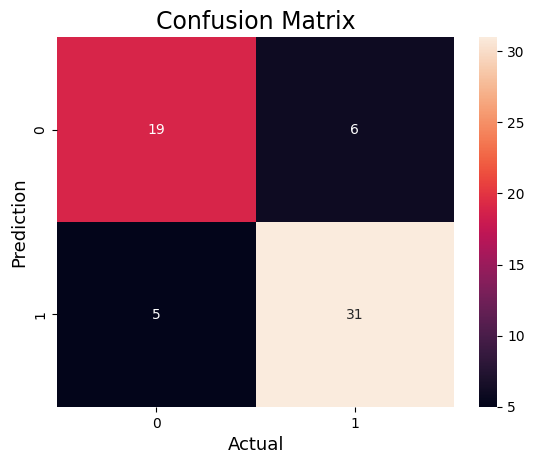

In [48]:
# preduction
y_pred = model.predict(X_test)
 
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### KNN

In [49]:
# Pembagian dataset menjadi 90% traning dan 10% testing
# Hal ini sebabkan akurasi paling rendah yang diperoleh yakni di K = 1 sebesar 61% selain itu diatas 61%
# Sedangankan pada percobaan lainnya dengan pembagian dataset yakni 80:20, 70:30, 60:40, 50:50 hasilnya nilih.
# Akurasi masih ada yang dibawah 61%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

<b>Catatan :</b><br>
Nilai k yang digunakan yakni K = 1, K = 3, K = 5, K = 7, K = 9, K = 11. <br>
Pada K = 11 merupakan nilai akurasi paling tinggi yakni 74% sedangkan K = 1 merupakan nilai akurasi paling rendah yakni 61%

##### k = 1

In [50]:
# Membuat model KNeighborsClassifier dengan jumlah tetangga = 1
model = KNeighborsClassifier(n_neighbors=1)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
prediction = model.predict(X_test)
# Melakukan prediksi menggunakan data uji
prediction = model.predict(X_test)


In [51]:
# Mencetak skor uji dengan 1 tetangga
print('Test score is: {:.2f}'.format(model.score(X_test,y_test)))


Test score is: 0.61


##### K = 3

In [52]:
# Membuat model KNeighborsClassifier dengan jumlah tetangga = 3
model = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Mencetak hasil prediksi dengan 3 tetangga
print(prediction)


[1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0]


In [53]:
# Persentasi hasil dari k = 3
print('Test score is: {:.2f}'.format(model.score(X_test,y_test)))
# accuracy_score(y_test,prediction)

Test score is: 0.71


##### K = 5

In [54]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

[0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1]


In [55]:
# Mencetak skor uji dengan 5 tetangga
print('Test score is: {:.2f}'.format(model.score(X_test,y_test)))


Test score is: 0.68


##### K = 7

In [56]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

[0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1]


In [57]:
# Mencetak skor uji dengan 7 tetangga
print('Test score is: {:.2f}'.format(model.score(X_test,y_test)))


Test score is: 0.68


##### K = 9

In [58]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

[0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1]


In [59]:
# Mencetak skor uji dengan 9 tetangga
print('Test score is: {:.2f}'.format(model.score(X_test,y_test)))


Test score is: 0.68


##### K = 11

In [60]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(prediction)

[0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1]


In [61]:
# Mencetak skor uji dengan 11 tetangga
print('Test score is: {:.2f}'.format(model.score(X_test,y_test)))


Test score is: 0.74


### Confusion Matrix KNN

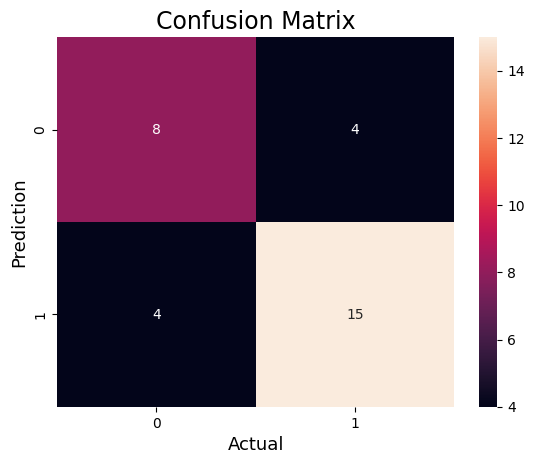

In [62]:
# preduction
y_pred = model.predict(X_test)
 
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

<b>Catatan:</b><br>
Dikarenakan hasil dari akurasi yang diperoleh pada algoritma KNN masih tergolong rendah maka untuk memaksimalkan hasil dengan harapan akan memperoleh hasil yang lebih baik dari sebelumnya maka akan dilakukan cross validation.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Menggunakan dataset diabetes yang tersedia di scikit-learn
from sklearn.datasets import load_diabetes

# Memuat dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Pisahkan fitur (X) dan target (y)
X = data.drop('target', axis=1)
y = data['target']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Sesuaikan parameter sesuai kebutuhan

# Lakukan cross-validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # Jumlah lipatan cross-validation (cv) dapat disesuaikan

# Menampilkan hasil cross-validation
print("Hasil Cross-Validation:")
print(cv_scores)
print(f"Rata-rata Akurasi: {cv_scores.mean():.2f}")